In [1]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import scipy

In [2]:
# file = h5py.File('/home/raulteixeira/repos/DESC_BPZ/tests/pz_DELVE_BDF_1.h5')

# data={}

# for key in file.keys():
#     if key=='ID':
#         data['COADD_OBJECT_ID']=np.array(file[key])
#     else: data[key]=np.array(file[key])

# t_bpz = pd.DataFrame(data)

#     t_specz = pd.read_csv('/home/raulteixeira/scratch-midway2/CosmicShearData/DELVE_BDF')

# data = pd.merge(t_bpz, t_specz, on='COADD_OBJECT_ID')

# pz = data['Z_B'].values
# specz = data['zspec'].values

In [2]:
data_zp=pd.read_csv('/home/raulteixeira/scratch-midway2/CosmicShearData/pz_DELVE_BDF.csv.gz')

t_bpz_zp = pd.DataFrame(data_zp)

t_specz_zp = pd.read_csv('/home/raulteixeira/scratch-midway2/CosmicShearData/DELVE_BDF_data_with_zspec022123.csv.gz')

data_zp = pd.merge(t_bpz_zp, t_specz_zp, on='COADD_OBJECT_ID')

pz_zp = data_zp['Z_B'].values
specz_zp = data_zp['zspec'].values

EOFError: Compressed file ended before the end-of-stream marker was reached

In [ ]:
file = h5py.File('/home/raulteixeira/scratch-midway2/CosmicShearData/DELVE_data_with_zspec012623.h5')
photometry = {}
for i, key in enumerate(file['df/block1_items']):
    photometry[key.decode()]=np.array(file['df/block1_values'][:,i])
for i, key in enumerate(file['df/block0_items']):
    photometry[key.decode()]=np.array(file['df/block0_values'][:,i])

In [ ]:
plt.xlabel('z_b - zspec')
plt.hist(pz_zp-specz_zp, bins=np.linspace(-.5,.5,100), histtype='step', label='zp');

# plt.xlabel('z_b - zspec')
# plt.hist(pz-specz, bins=np.linspace(-.5,.5,100), histtype='step', label='no zp');
# plt.legend()
# plt.show()

In [ ]:
plt.ylabel('zb-zspec/(1+zspec)')
plt.xlabel('zspec')
plt.scatter(specz_zp ,(pz_zp-specz_zp)/(1+specz_zp), s=.01);

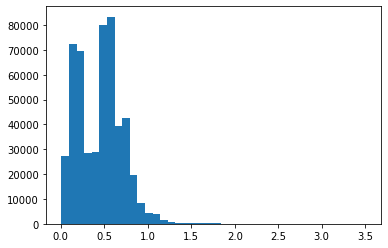

In [8]:
plt.hist(pz_zp, bins=40);

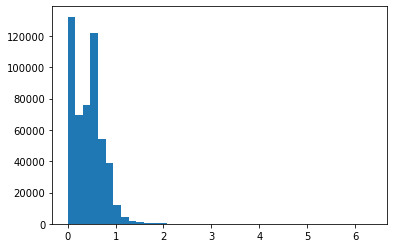

In [9]:
plt.hist(specz_zp, bins=40);

In [11]:
from scipy.stats import gaussian_kde
xy10k = np.vstack([specz_zp[:10000], pz_zp[:10000]])
xy = np.vstack([specz_zp,pz_zp])
colors = gaussian_kde(xy10k)(xy)

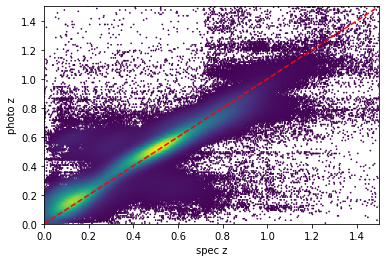

In [12]:
plt.ylabel('photo z')
plt.xlabel('spec z')
plt.xlim(0, 1.5)
plt.ylim(0, 1.5)
plt.scatter(specz_zp, pz_zp, c=colors, s=.5)
plt.plot(np.linspace(0, 1.5), np.linspace(0, 1.5), 'r--')
plt.show()

In [14]:
masks = []
for i in range(17, 24):
    masks.append(np.logical_and(i<data_zp['BDF_MAG_I'],i+1>data_zp['BDF_MAG_I']))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


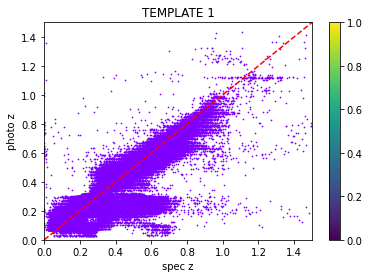

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


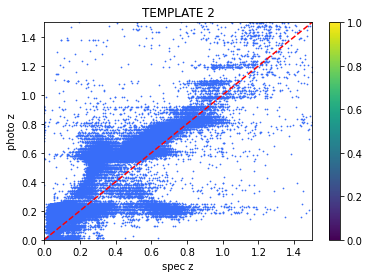

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


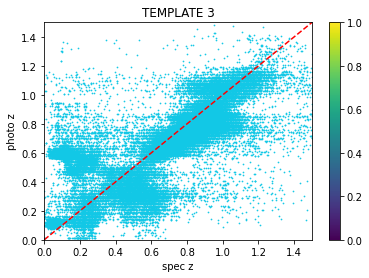

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


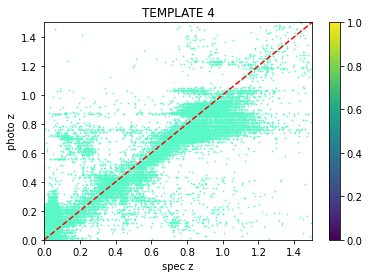

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


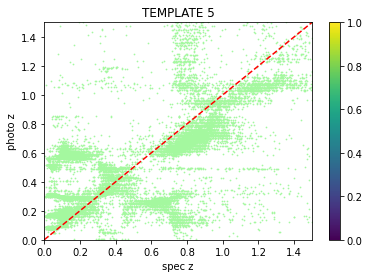

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


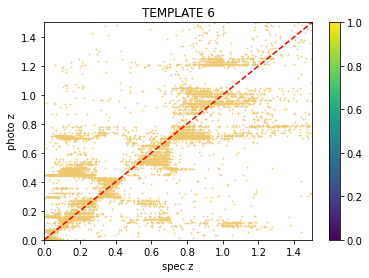

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


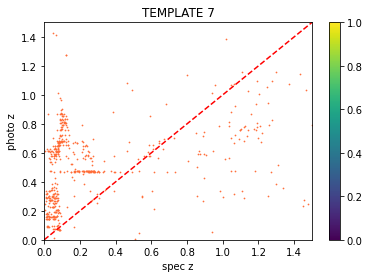

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


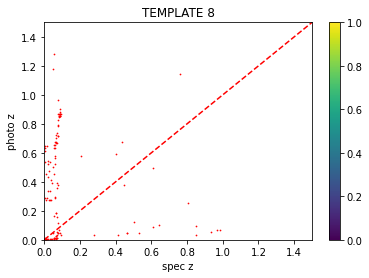

In [9]:
for i in range(8):
    colors = plt.get_cmap("rainbow")(np.linspace(0,1,8))
    mask = t_bpz_zp['T_B']==i+1
    plt.ylabel('photo z')
    plt.xlabel('spec z')
    plt.title(f'TEMPLATE {i+1}')
    #xy10k = np.vstack([specz[mask][:10000],pz[mask][:10000]])
    #xy = np.vstack([specz[mask], pz[mask]])
    #colors = gaussian_kde(xy10k)(xy)

    plt.xlim(0, 1.5)
    plt.ylim(0, 1.5)
    plt.scatter(specz_zp[mask], pz_zp[mask], c=colors[i], s=.5)
    plt.colorbar()
    plt.plot(np.linspace(0, 1.5), np.linspace(0, 1.5), 'r--')
    plt.show()

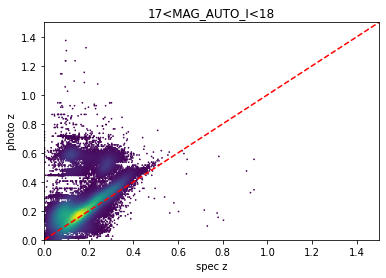

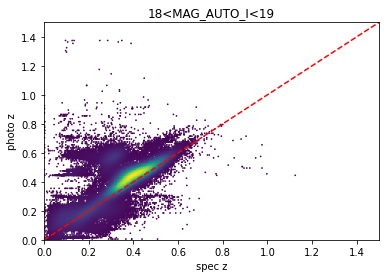

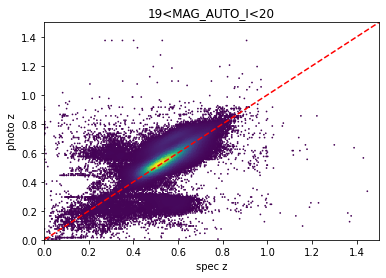

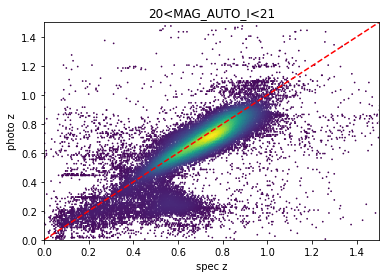

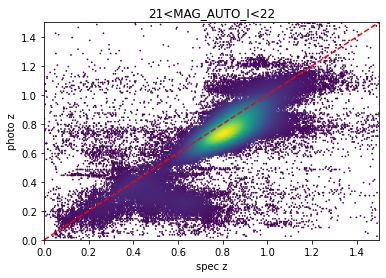

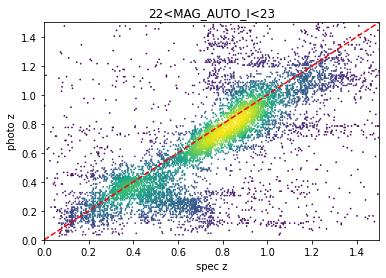

In [15]:
for i in range(0, 6):
    mask = masks[i]
    plt.ylabel('photo z')
    plt.xlabel('spec z')
    plt.title(f'{i+17}<MAG_AUTO_I<{i+18}')
    xy10k = np.vstack([specz_zp[mask][:10000],pz_zp[mask][:10000]])
    xy = np.vstack([specz_zp[mask], pz_zp[mask]])
    colors = gaussian_kde(xy10k)(xy)

    plt.xlim(0, 1.5)
    plt.ylim(0, 1.5)
    plt.scatter(specz_zp[mask], pz_zp[mask], c=colors, s=.5)
    plt.plot(np.linspace(0, 1.5), np.linspace(0, 1.5), 'r--')
    plt.show()

In [25]:
delta_z_oz = (pz_zp-specz_zp)/(1+specz_zp)
mask_dz = delta_z_oz<.05
bad_mask_dz = delta_z_oz>.1

In [28]:
bands = ['G', 'R', 'I', 'Z']
g, r, i, z = (data_zp[f'BDF_MAG_{band}'].values for band in bands)

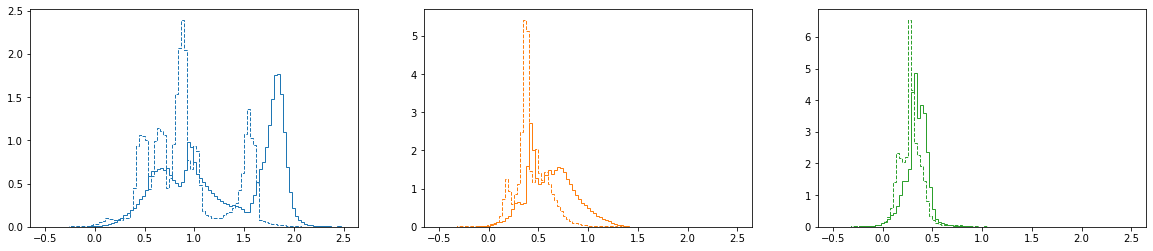

In [66]:
fig, ax = plt.subplots(1, 3, figsize=(20, 4))
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
bins=np.linspace(-.5, 2.5, 100)
ax[0].hist((g-r)[mask_dz], label='g-r good', bins=bins, histtype='step', density=1, color=colors[0]);
ax[1].hist((r-i)[mask_dz], label='r-i good', bins=bins, histtype='step', density=1, color=colors[1]);
ax[2].hist((i-z)[mask_dz], label='i-z good', bins=bins, histtype='step', density=1, color=colors[2]);
ax[0].hist((g-r)[bad_mask_dz], label='g-r bad', bins=bins, histtype='step', ls='--', density=1, color=colors[0]);
ax[1].hist((r-i)[bad_mask_dz], label='r-i bad', bins=bins, histtype='step', ls='--', density=1, color=colors[1]);
ax[2].hist((i-z)[bad_mask_dz], label='i-z bad', bins=bins, histtype='step', ls='--', density=1, color=colors[2]);

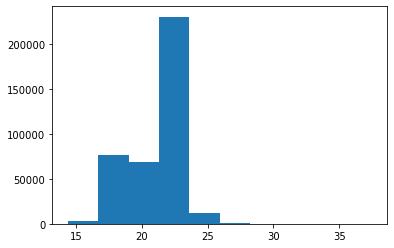

In [55]:
plt.hist(g[mask_dz]);

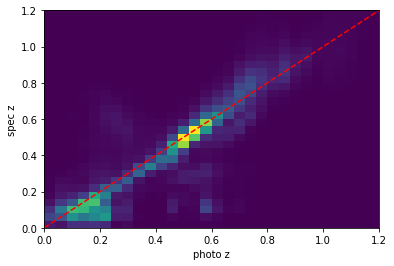

In [16]:
plt.xlabel('photo z')
plt.ylabel('spec z')
plt.hist2d(pz_zp, specz_zp, range=[(0, 1.2),(0, 1.2)], bins=30)
plt.plot(np.linspace(0, 1.2), np.linspace(0, 1.2), 'r--')
plt.show()

In [17]:
import numpy as np


def sigma_general(x, interval=68.0, min_samples=10):
    """
    Calculates the half-interval around the median of a distribution.

    Parameters
    ----------
    x : ndarray of shape (n, )
        Distribution samples.
    interval : float
        Interval around the median.
    min_samples : int
        Function returns nan if len(x)<min_samples
    Returns
    -------
    plow : float
        Returns p[50-interval/2]
    phigh : float
        Returns p[50+interval/2]
    sigma : float
        Returns (phigh - plow) / 2.0
    """
    msg = "Interval needs to be in range [0,100]"
    assert ((interval > 0.0) & (interval < 100.0)), msg

    intervals = [50.0 - interval / 2.0, 50.0 + interval / 2.0]
    if(len(x) > min_samples):
        plow, phigh = np.percentile(x, intervals)
        sigma = (phigh - plow) / 2.0
        return plow, phigh, sigma
    else:
        return np.ones(3)*np.nan


def magbins_sg68_OR_boostrap(dz, mag, magbins, interval=68.0, min_samples=10):
    """
    Calculates half-interval around the median of a distribution conditioned
    on a secondary quantity, and the outlier rate. The outlier rate is defined
    as the tail beyond three intervals around the median. The error is
    calculated by boostrapping subsamples.

    Parameters
    ----------
    dz : ndarray of shape (n, )
        Distribution samples.
    mag : ndarray of shape (n, )
        Secondary quantity to slice the data to compute summary statistics
        from p(dz | mag )
    magbins : ndarray of shape (nbins, )
        Bins used to slice on the secondary quantity.
    interval : float
        Interval around the median for sigma.
    min_samples : int
        Function returns nan if len(x)<min_samples in sigma.
    Returns
    -------
    sg68_boots_mean : ndarray of shape (nbins, )
        Average sigma.
    sg68_boots_std : ndarray of shape (nbins, )
        RMS sigma.
    or_boots_mean : ndarray of shape (nbins, )
        Average outlier rate.
    or_boots_std : ndarray of shape (nbins, )
        RMS outlier rate.
    """
    magbinsc = 0.5*(magbins[1:]+magbins[:-1])
    sg68_boots_mean = np.zeros_like(magbinsc)
    sg68_boots_std = np.zeros_like(magbinsc)
    or_boots_mean = np.zeros_like(magbinsc)
    or_boots_std = np.zeros_like(magbinsc)
    for i in range(len(magbinsc)):
        sel = (mag >= magbins[i]) & (mag < magbins[i+1])
        dz_sub = dz[sel]
        len_sub = len(dz_sub)
        arange_sub = np.arange(len(dz_sub))
        sg68_boots_mag = []
        or_boots_mag = []
        for j in range(1000):
            dz_sub_boots = dz_sub[np.random.choice(arange_sub, len_sub, replace=True)]
            try:
                sg68_boots_mag.append(sigma_general(dz_sub_boots, interval)[-1])
            except:
                sg68_boots_mag.append(np.nan)
            or_boots_mag.append((abs(dz_sub_boots)>3*sg68_boots_mag[j]).sum()/float(len_sub))
        sg68_boots_mean[i] = np.nanmean(sg68_boots_mag)
        sg68_boots_std[i] = np.nanstd(sg68_boots_mag, ddof=1)
        or_boots_mean[i] = np.nanmean(or_boots_mag)
        or_boots_std[i] = np.nanstd(or_boots_mag, ddof=1)

    return sg68_boots_mean, sg68_boots_std, or_boots_mean, or_boots_std


def magbins_sg68_OR_fixedthresh_boostrap(dz, mag, magbins, thresh, interval=68.0, min_samples=10):
    """
    Calculates half-interval around the median of a distribution conditioned
    on a secondary quantity, and the outlier rate. The outlier rate is defined
    as the tail beyond a fixed given interval around the median. The error is
    calculated by boostrapping subsamples.

    Parameters
    ----------
    dz : ndarray of shape (n, )
        Distribution samples.
    mag : ndarray of shape (n, )
        Secondary quantity to slice the data to compute summary statistics
        from p(dz | mag )
    magbins : ndarray of shape (nbins, )
        Bins used to slice on the secondary quantity.
    thresh : float
        Outlier rate fixed threshold interval around the median.
    interval : float
        Interval around the median for sigma.
    min_samples : int
        Function returns nan if len(x)<min_samples in sigma.
    Returns
    -------
    sg68_boots_mean : ndarray of shape (nbins, )
        Average sigma.
    sg68_boots_std : ndarray of shape (nbins, )
        RMS sigma.
    or_boots_mean : ndarray of shape (nbins, )
        Average outlier rate.
    or_boots_std : ndarray of shape (nbins, )
        RMS outlier rate.
    """
    magbinsc = 0.5*(magbins[1:]+magbins[:-1])
    sg68_boots_mean = np.zeros_like(magbinsc)
    sg68_boots_std = np.zeros_like(magbinsc)
    or_boots_mean = np.zeros_like(magbinsc)
    or_boots_std = np.zeros_like(magbinsc)
    for i in range(len(magbinsc)):
        sel = (mag >= magbins[i]) & (mag < magbins[i+1])
        dz_sub = dz[sel]
        len_sub = len(dz_sub)
        arange_sub = np.arange(len(dz_sub))
        sg68_boots_mag = []
        or_boots_mag = []
        for j in range(1000):
            dz_sub_boots = dz_sub[np.random.choice(arange_sub, len_sub, replace=True)]
            sg68_boots_mag.append(sigma_general(dz_sub_boots, interval)[-1])
            or_boots_mag.append((abs(dz_sub_boots) > thresh).sum()/float(len_sub))
        sg68_boots_mean[i] = np.mean(sg68_boots_mag)
        sg68_boots_std[i] = np.std(sg68_boots_mag, ddof=1)
        or_boots_mean[i] = np.mean(or_boots_mag)
        or_boots_std[i] = np.std(or_boots_mag, ddof=1)

    return sg68_boots_mean, sg68_boots_std, or_boots_mean, or_boots_std


def mean_median_boostrap(dz, val, valbins):
    """
    Calculates mean and median of the distribution. The error is
    calculated by boostrapping subsamples.

    Parameters
    ----------
    dz : ndarray of shape (n, )
        Distribution samples.
    val : ndarray of shape (n, )
        Secondary quantity to slice the data to compute summary statistics
        from p(dz | val )
    valbins : ndarray of shape (nbins, )
        Bins used to slice on the secondary quantity.
    Returns
    -------
    mean_boots_mean : ndarray of shape (nbins, )
        Average mean.
    mean_boots_std : ndarray of shape (nbins, )
        RMS mean.
    median_boots_mean : ndarray of shape (nbins, )
        Average median.
    median_boots_std : ndarray of shape (nbins, )
        RMS median.
    """
    valbinsc = 0.5*(valbins[1:]+valbins[:-1])
    mean_boots_mean = np.zeros_like(valbinsc)
    mean_boots_std = np.zeros_like(valbinsc)
    median_boots_mean = np.zeros_like(valbinsc)
    median_boots_std = np.zeros_like(valbinsc)
    for i in range(len(valbinsc)):
        sel = (val >= valbins[i]) & (val < valbins[i+1])
        dz_sub = dz[sel]
        len_sub = len(dz_sub)
        arange_sub = np.arange(len(dz_sub))
        mean_boots_mag = []
        median_boots_mag = []
        for j in range(1000):
            dz_sub_boots = dz_sub[np.random.choice(arange_sub, len_sub, replace=True)]
            mean_boots_mag.append(np.mean(dz_sub_boots))
            median_boots_mag.append(np.median(dz_sub_boots))
        mean_boots_mean[i] = np.mean(mean_boots_mag)
        mean_boots_std[i] = np.std(mean_boots_mag, ddof=1)
        median_boots_mean[i] = np.mean(median_boots_mag)
        median_boots_std[i] = np.std(median_boots_mag, ddof=1)

    return mean_boots_mean, mean_boots_std, median_boots_mean, median_boots_std

def deltaz(zs, zb):
    dz = (zb-zs)/(1.0+zs)
    return dz

In [23]:
# z_bins = np.linspace(specz.min(), specz.max(), 15)
# magbins = np.concatenate((np.linspace(17,22,30), [22.5, 23]))
# magbinsc = 0.5*(magbins[1:]+magbins[:-1])
# dz = deltaz(specz, pz)
# means_sz, err_means_sz, medians_sz, err_medians_sz = mean_median_boostrap(dz, specz, z_bins)
mags = photometry['BDF_MAG_I']
# means_sz, err_means_sz, medians_sz, err_medians_sz = mean_median_boostrap(dz, mags, magbins)
# sg68_boots_mean, sg68_boots_std, or_boots_mean, or_boots_std = magbins_sg68_OR_boostrap(dz, mags, magbins, interval=68.0, min_samples=10)

NameError: name 'photometry' is not defined

In [22]:
z_bins = np.linspace(specz_zp.min(), specz_zp.max(), 15)
magbins = np.concatenate((np.linspace(17,22,30), [22.5, 23]))
magbinsc = 0.5*(magbins[1:]+magbins[:-1])
dz_zp = deltaz(specz_zp, pz_zp)
means_sz_zp, err_means_sz_zp, medians_sz_zp, err_medians_sz_zp = mean_median_boostrap(dz_zp, specz_zp, z_bins)

means_sz_zp, err_means_sz_zp, medians_sz_zp, err_medians_sz_zp = mean_median_boostrap(dz_zp, mags, magbins)
sg68_boots_mean_zp, sg68_boots_std_zp, or_boots_mean_zp, or_boots_std_zp = magbins_sg68_OR_boostrap(dz_zp, mags, magbins, interval=68.0, min_samples=10)

NameError: name 'mags' is not defined

In [ ]:
plt.xlabel('mag_auto_i')
plt.ylabel(r'$\sigma_{68}$')
#plt.errorbar(magbinsc, sg68_boots_mean, yerr=sg68_boots_std, fmt='.', label='no zp')
plt.errorbar(magbinsc, sg68_boots_mean_zp, yerr=sg68_boots_std_zp, fmt='.', label='zp')
plt.legend()
plt.show()

In [ ]:
plt.hist(mags, bins=np.linspace(17,25,30))